# FODO lattice

If you have not installed the following packages, please uncomment the following lines
```
!pip install sympy
```

In [1]:
# few packages to import
import sympy as sy
import numpy as np
from sympy import init_session
init_session() 
la=np.linalg

IPython console for SymPy 1.13.3 (Python 3.12.7-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.3/



## A simple FODO cell
In the following we will consider a FODO cell of length $L_{cell}$ in thin lens approximation, where 
1. the space of the focusing (F) and defocusing (D) quadrupoles is equal to $L_{cell}/2$ and
2. the focal length of the F and D quadrupoles equal in module, that is $f_D=-f_F$ with $f_F>0$.

For convenience we will start and end the FODO cell with half of an F quadrupole (i.e., with focal length $2\times f_F$).

In [2]:
L_cell=sy.Symbol('L_cell', positive=True, real=True);
f_F=sy.Symbol('f_F', positive=True, real=True);
f_D=sy.Symbol('f_D', positive=True, real=True);
f=sy.Symbol('f', positive=True, real=True);


QF_half=sy.Matrix([[1,0], [-1/(2*f),1]])
DRIFT=sy.Matrix([[1,L_cell/2], [0,1]])
QD=sy.Matrix([[1,0], [1/f,1]])

### The OTM in the x-plane

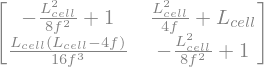

In [3]:
M_OTM=QF_half@DRIFT@QD@DRIFT@QF_half
M_OTM=sy.simplify(M_OTM)
M_OTM

Now we need to study the eigenvalues and eigenvectors of the OTM.

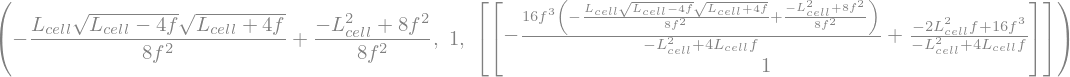

In [4]:
eigenVectors=M_OTM.eigenvects()
sy.simplify(eigenVectors[0])


### Lattice Stability
We remeber that, for 1-D stable lattice, the 2 eigenvalues are in the form $\lambda_{1,2}=e^{\pm i\mu}$, where $\mu$ is the lattice phase advance. The sum of the two eivenvalues, $\lambda_1$ and $\lambda_2$, is $2\cos(\mu)$, then we can impose that  $-2<\lambda_1+\lambda_2<2$ to get the stability condition in the x-plane.  Due to the symmetry the stability on the y-plane follows (the OTM of the $y$-plane is similar to the one of the $x$-plane, therefore they shares the same eigenvalues).

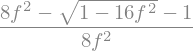

In [5]:
# First eigenvalue (in L_cell units)
sy.simplify(eigenVectors[0][0].subs(L_cell,1))

# Second eigenvalue (in L_cell units)
sy.simplify(eigenVectors[0][0].subs(L_cell,1))

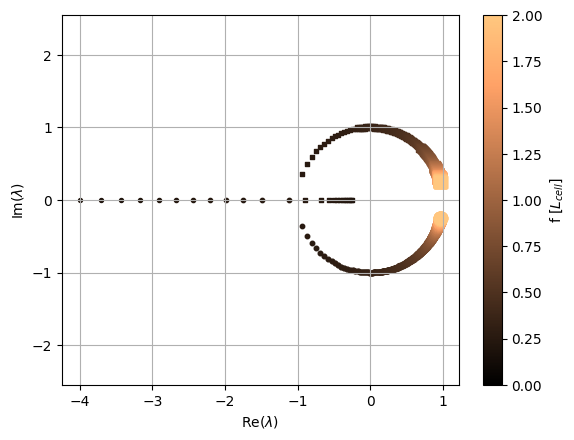

In [6]:
import cmath
def eig1(myf):
    return (8*myf**2-cmath.sqrt(-16*myf**2+1)-1)/(8*myf**2)

def eig2(myf):
    return (8*myf**2+cmath.sqrt(-16*myf**2+1)-1)/(8*myf**2)

colormap1 = plt.cm.copper
colormap2 = plt.cm.copper

normalize = matplotlib.colors.Normalize(vmin=0, vmax=2)
#plt.scatter(x, y, c=z, s=5, cmap=colormap, norm=normalize, marker='*')
for myf in np.linspace(0.2,2,400):
    aux=eig1(myf)
    plt.scatter([np.real(aux)],[np.imag(aux)],s=[myf*40],c=[myf],cmap=colormap1, norm=normalize )
    aux=eig2(myf)
    plt.scatter([np.real(aux)],[np.imag(aux)],s=[myf*40],c=[myf],cmap=colormap2,marker='s', norm=normalize)
plt.axis('equal')
plt.grid()
a=plt.colorbar()
a.set_label('f [$L_{cell}$]')
plt.xlabel('Re($\\lambda$)')
plt.ylabel('Im($\\lambda$)');
#plt.savefig('/cas/images/eigenvaluesLocus.pdf')

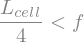

In [7]:
aux=sy.solve([eigenVectors[0][0]+eigenVectors[1][0]<2,eigenVectors[0][0]+eigenVectors[1][0]>-2],f)
aux

The relation above states that if the quadrupoles are weak enough, $f>L_{cell}/4$, then the lattice is stable.

## Computing optics function

We will now compute the $\beta$-function at the center of the F and D quadrupoles. To do that we need to decompose the $M_{OTM}$ in diagonal form that is
\begin{equation}
M_{OTM}=P D P^{-1}
\end{equation}

It is important to remeber that if $M_{OTM}$ can be put in diagonal form then, infinite $P$ matrixes exist. In our convention we will chose the $P$ such that
1. its determinant is $-i$,
2. $P_{11}=P_{12}$.

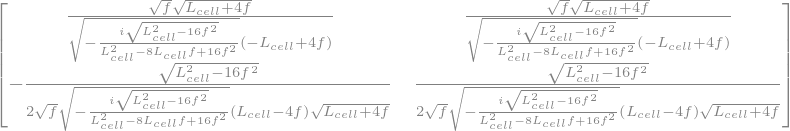

In [8]:
# P definition
P=sy.Matrix([[eigenVectors[1][2][0][0]*eigenVectors[0][2][0][0],eigenVectors[0][2][0][0]*eigenVectors[1][2][0][0]],[eigenVectors[1][2][0][1]*eigenVectors[0][2][0][0],eigenVectors[0][2][0][1]*eigenVectors[1][2][0][0]]])
P=sy.simplify(P)
P=sy.simplify(P*(1/(sy.sqrt((P.det()*sy.I)))))
P

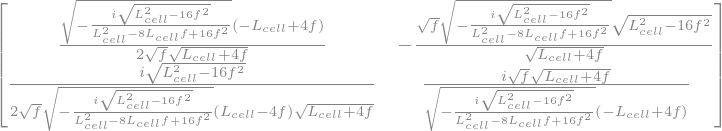

In [9]:
# P inverse definition
Pinv=sy.simplify(P.inv())
Pinv

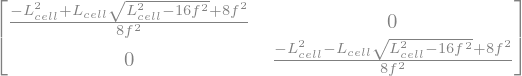

In [10]:
# D definition
D=sy.Matrix([[eigenVectors[1][0],0],[0,eigenVectors[0][0]]])
D=sy.simplify(D)
D

As sanity check we verify the diagonal form

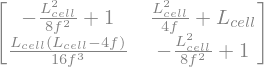

*******
Check
*******


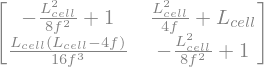

In [11]:
display(sy.simplify(M_OTM))
aux=sy.simplify(P*D*Pinv)
print('*******\nCheck\n*******')
display(aux)

and the P determinant is $-i$

In [12]:
sy.simplify(P.det())

### The cell phase advance 

As already recalled
\begin{equation}
\lambda_1+\lambda_2=2 \cos(\mu),
\end{equation}
then we get

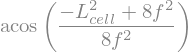

In [13]:
sy.acos((eigenVectors[0][0]+eigenVectors[1][0])/2)

that is 
\begin{equation}
\boxed{
\mu=\arccos \left(1-\frac{L_{cell}^2}{8 f^2}\right)
}
\end{equation}


and remembering that (https://www.wolframalpha.com/input/?i=sin(arccos(1-x)%2F2))
\begin{equation}
\sin\left(\frac{\arccos(1-x)}{2}\right)=\sqrt{\frac{x}{2}}
\end{equation}
we have

\begin{equation}
\boxed{
\sin\left(\frac{\mu}{2}\right)=\frac{L_{cell}}{4f}
}
\end{equation}

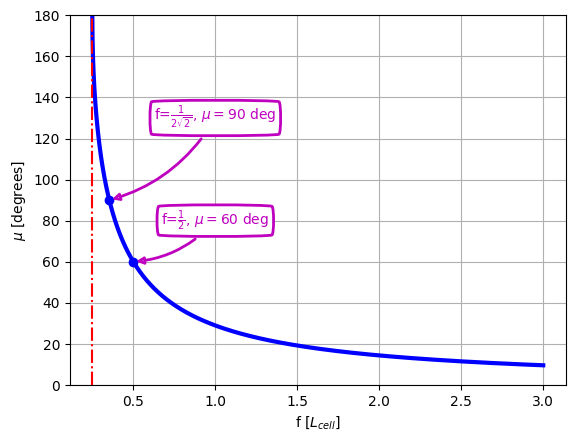

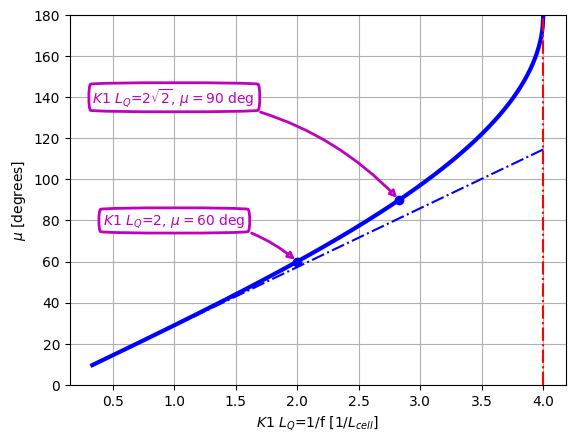

In [14]:
def mu_degrees(f):
    return np.arccos(1-1/8/f**2)/np.pi*180


myF=np.linspace(0.25, 3,10000)

def setArrowLabel(ax, label='myLabel',arrowPosition=(0,0),labelPosition=(0,0), myColor='k', arrowArc_rad=-0.2):
    return ax.annotate(label,
                  xy=arrowPosition, xycoords='data',
                  xytext=labelPosition, textcoords='data',
                  size=10, color=myColor,va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w",color=myColor,lw=2),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad="+str(arrowArc_rad),
                                  fc="w", color=myColor,lw=2), 
                  )

plt.plot(myF,mu_degrees(myF),'b', lw=3)

plt.plot(.5,mu_degrees(.5),'ob')
plt.plot(.5/np.sqrt(2),mu_degrees(.5/np.sqrt(2)),'ob')

plt.plot([.25, .25],[0, 180],'-.r')
plt.ylim(0,180)
plt.xlabel('f [$L_{cell}$]')
plt.ylabel('$\\mu$ [degrees]')
plt.grid()
setArrowLabel(plt.gca(), label='f=$\\frac{1}{2}$, $\\mu=60$ deg ', labelPosition=(1, 80), arrowPosition=(0.5, 60), myColor='m',arrowArc_rad=-0.2)
setArrowLabel(plt.gca(), label='f=$\\frac{1}{2\\sqrt{2}}$, $\\mu=90$ deg ', labelPosition=(1, 130), arrowPosition=(.5/np.sqrt(2), 90), myColor='m',arrowArc_rad=-0.2)

plt.figure()

plt.plot(1/myF,mu_degrees(myF),'b',lw=3)
plt.plot(1/myF,mu_degrees(100)*100/myF,'-.b')
plt.plot([4, 4],[0, 180],'-.r')
plt.plot(1/.5,mu_degrees(.5),'ob')
plt.plot(1/(.5/np.sqrt(2)),mu_degrees(.5/np.sqrt(2)),'ob')

plt.xlabel('$K1\\ L_Q$=1/f [$1/L_{cell}$]')
plt.ylabel('$\\mu$ [degrees]')
plt.ylim(0,180)
setArrowLabel(plt.gca(), label='$K1\\ L_Q$=2, $\\mu=60$ deg ', labelPosition=(1, 80), arrowPosition=(1/0.5, 60), myColor='m',arrowArc_rad=-0.2)
setArrowLabel(plt.gca(), label='$K1\\ L_Q$=$2\\sqrt{2}$, $\\mu=90$ deg ', labelPosition=(1, 140), arrowPosition=(1/(.5/np.sqrt(2)), 90), myColor='m',arrowArc_rad=-0.2)

plt.grid()

### Computing the $\beta$-function
Remebering that 
\begin{equation}
P=\left(
\begin{array}{cc}
\sqrt{\dfrac{\beta }{2}} &  \sqrt{\dfrac{\beta }{2}}\\[12pt]
\dfrac{-\alpha +i}{\sqrt{2\beta }} &   \dfrac{-\alpha -i}{\sqrt{2\beta}}\\
\end{array}
\right)
\end{equation}


the $\beta$-function at the start of the cell is $2\ P_{11}^2$, therefore

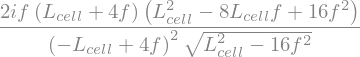

In [15]:
2*P[0]**2

The stability condition will ensure that the quantity above is positive. To simplify it we extract the abs.

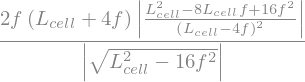

In [16]:
sy.functions.Abs(2*P[0]**2)

Therefore ($4 f> L$) we obtain that 
\begin{equation}
\beta_F=\frac{2f \sqrt{4f+L_{cell}} }{\sqrt{4f-L_{cell}}}
\end{equation}
and remembering that $\sin(\mu/2)=\frac{L_{cell}}{4f}$ we can write
\begin{equation}
\beta_F=2f \frac{ \sqrt{1+\sin(\mu/2)} }{\sqrt{1-\sin(\mu/2)}}=L_{cell} \frac{1}{2 \sin(\mu/2)} \frac{ \sqrt{1+\sin(\mu/2)} }{\sqrt{1-\sin(\mu/2)}}=\boxed{L_{cell} \frac{1+\sin(\mu/2)}{\sin(\mu)}}
\end{equation}

To get the $\beta_D$ it is enough to revaluate $2\ P_{11}^2$ after having replace $f$ with the $-f$. That is

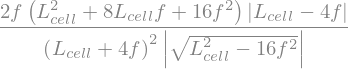

In [17]:
sy.functions.Abs(2*P[0].subs(f, -f)**2)

Therefore we obtain that 
\begin{equation}
\beta_D=2f \frac{ \sqrt{4f-L_{cell}} }{\sqrt{4f+L_{cell}}}
\end{equation}
and remembering that $\sin(\mu/2)=\frac{L_{cell}}{4f}$ we can write
\begin{equation}
\beta_D=2f \frac{ \sqrt{1-\sin(\mu/2)} }{\sqrt{1+\sin(\mu/2)}}=L_{cell} \frac{1}{2 \sin(\mu/2)} \frac{ \sqrt{1-\sin(\mu/2)} }{\sqrt{1+\sin(\mu/2)}}=\boxed{L_{cell} \frac{1-\sin(\mu/2)}{\sin(\mu)}}
\end{equation}

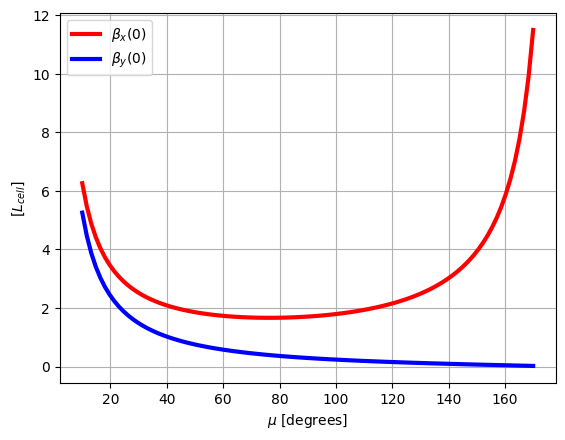

In [18]:
def betaF_L(mu_rad):
    return (1+np.sin(mu_rad/2))/np.sin(mu_rad)

def betaD_L(mu_rad):
    return (1-np.sin(mu_rad/2))/np.sin(mu_rad)

mu=np.linspace(10,170,100)
plt.plot(mu,betaF_L(mu/180*np.pi),'r', label='$\\beta_x(0)$', lw=3)
plt.plot(mu,betaD_L(mu/180*np.pi),'b', label='$\\beta_y(0)$', lw=3)
plt.grid()
plt.xlabel('$\\mu$ [degrees]')
plt.ylabel('[$L_{cell}$]')
plt.legend(loc='best')
# plt.savefig('/cas/images/betaOfFODO.pdf')


### Computing the $\alpha$-function
Remebering that 
\begin{equation}
P=\left(
\begin{array}{cc}
\sqrt{\dfrac{\beta }{2}} &  \sqrt{\dfrac{\beta }{2}}\\[12pt]
\dfrac{-\alpha +i}{\sqrt{2\beta }} &   \dfrac{-\alpha -i}{\sqrt{2\beta}}\\
\end{array}
\right)
\end{equation}


the $\alpha$-function at the start of the cell is $\boxed{- P_{11}(P_{21}+P_{22})}$, therefore

In [19]:
# at the center of the F quadrupole
P[0]*(P[2]+P[3])

In [20]:
# at the center of the D quadrupole
aux=P.subs(f, -f)
aux[0]*(aux[2]+aux[3])

We have then 
\begin{equation}
\alpha_F=\alpha_D=0
\end{equation}
that is in the quadrupoles we have local maxima or minima of the $\beta$-function.

### Chromaticity of a FODO
The definition of the linear chromaticity is 
\begin{equation}
\xi=\frac{\Delta Q}{\frac{\Delta p}{p_0}}
\end{equation}
and, for the single FODO cell,
\begin{equation}
\xi=\frac{1}{2 \pi}\frac{\Delta \mu}{\frac{\Delta p}{p_0}}
\end{equation}
From the definition of 
\begin{equation}
f\left(\frac{\Delta p}{p_0}\right)=f\times\left(1+\frac{\Delta p}{p_0}\right)
\end{equation}
and from
\begin{equation}
\sin\left(\frac{\mu}{2}\right)=\frac{L_{cell}}{4f}
\end{equation}
one can compute the FODO lattice chromaticity

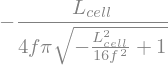

In [21]:
delta=sy.Symbol('delta', real=True);
pi=sy.Symbol('pi', real=True);
(sy.diff(1/pi*sy.asin(L_cell/(f*(1+delta))/4),delta)).subs(delta,0)

This means that
\begin{equation}
\xi=-\frac{1}{4\pi}\frac{L_{cell}}{f}\frac{1}{\cos(\mu/2)}=\boxed{-\frac{1}{\pi}\tan\left(\frac{\mu}{2}\right)}
\end{equation}


Text(0, 0.5, 'Chromaticity')

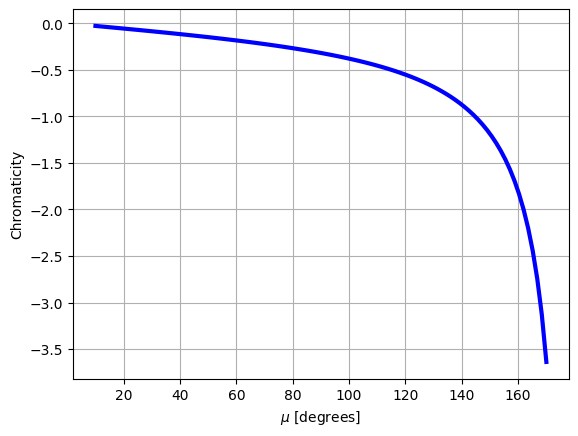

In [22]:
def chroma(mu_rad):
    return -1/np.pi*np.tan(mu_rad/2)


mu=np.linspace(10,170,100)
plt.plot(mu,chroma(mu/180*np.pi),'b', label='$\\xi_{x,y}$', lw=3)
plt.grid()
plt.xlabel('$\\mu$ [degrees]')
plt.ylabel('Chromaticity')

# Other lattice topologies
We presented few results of on a simple FODO lattice
- stability,
- phase advance,
- $\beta$ and $\alpha$ function in the center of the quadrupoles,
- chromaticity.

A very similar approach can be followed for other topologies. We present few examples.

### FODO with $f_F\ne f_D$

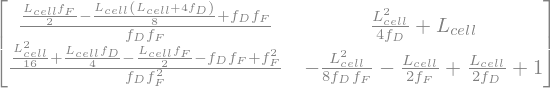

In [23]:
L_cell=sy.Symbol('L_cell', positive=True, real=True);
f_F=sy.Symbol('f_F', positive=True, real=True);
f_D=sy.Symbol('f_D', positive=True, real=True);


QF_half=sy.Matrix([[1,0], [-1/(2*f_F),1]])
DRIFT=sy.Matrix([[1,L_cell/2], [0,1]])
QD=sy.Matrix([[1,0], [1/f_D,1]])

# STEP 1: OTM matrix
M_OTM=QF_half@DRIFT@QD@DRIFT@QF_half
M_OTM=sy.simplify(M_OTM)
M_OTM

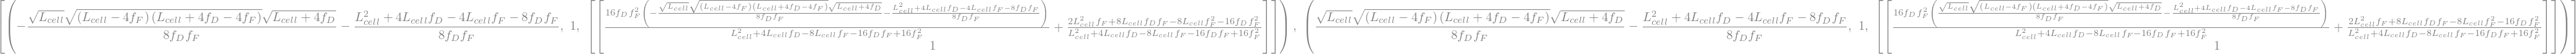

In [24]:
# STEP 2: eigen-decomposition 
eigenVectors=M_OTM.eigenvects()
#eigenVectors=sy.simplify(eigenVectors)
eigenVectors

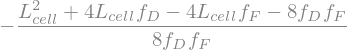

In [25]:
# Computation of cos(\mu)
(eigenVectors[0][0]+eigenVectors[1][0])/2

Now we want to find the domain in the $f_F$ and $f_D$ plane where -1<$\cos(\mu)$<1 for **BOTH** planes (it is important to note that there is an asymmetry between the planes for this configuration, $D(f_F, f_D)\ne D(-f_F,-f_D)$). 

In [26]:
# We express cos(\mu) assuming L_cell=1, that is we express f_F and f_D in units of L_cell.
def myFunc(f_F,f_D):
    if ((-(-8*f_D*f_F - 4*f_D + 4*f_F + 1)/(8*f_D*f_F))>=-1) and ((-(-8*f_D*f_F - 4*f_D + 4*f_F + 1)/(8*f_D*f_F))<=1):
        return 1
    else:
        return 0

vecFunc = np.vectorize(myFunc)

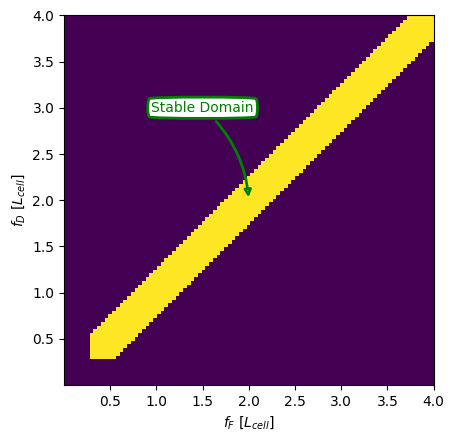

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# make these smaller to increase the resolution
dx, dy = 0.01, 0.01

# generate 2 2d grids for the x & y bounds
x,y = np.meshgrid(np.linspace(0.001,4,100),
                np.linspace(0.001,4,100))
z = vecFunc(x,y)*vecFunc(y,x)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]

plt.pcolor(x, y, z)
plt.xlabel('$f_F$ [$L_{cell}$]')
plt.ylabel('$f_D$ [$L_{cell}$]')
setArrowLabel(plt.gca(), label='Stable Domain', labelPosition=(1.5, 3), arrowPosition=(2,2), myColor='g',arrowArc_rad=-0.2)

plt.axis('square');
#plt.savefig('/cas/images/stabilityFFFD_1.pdf')

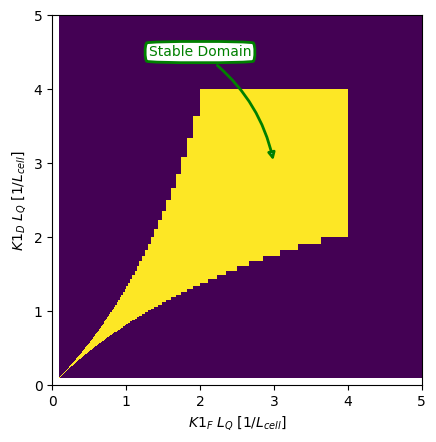

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# make these smaller to increase the resolution
dx, dy = 0.01, 0.01

# generate 2 2d grids for the x & y bounds
x,y = np.meshgrid(np.linspace(0.00001,10,400),
                np.linspace(0.00001,10,400))
z = vecFunc(x,y)*vecFunc(y,x)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]


plt.pcolor(1/x, 1/y, z)
plt.axis('square')
plt.xlabel('$K1_F\\ L_Q$ [$1/L_{cell}$]')
plt.ylabel('$K1_D\\ L_Q$ [$1/L_{cell}$]')
setArrowLabel(plt.gca(), label='Stable Domain', labelPosition=(2, 4.5), arrowPosition=(3,3), myColor='g',arrowArc_rad=-0.2)

plt.xlim(0,5)
plt.ylim(0,5);

### Varying the quadrupole distance

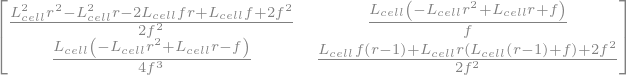

In [29]:
L_cell=sy.Symbol('L_cell', positive=True, real=True);
f=sy.Symbol('f', positive=True, real=True);
r=sy.Symbol('r', positive=True, real=True);


QF=sy.Matrix([[1,0], [-1/(f),1]])
QF_half=sy.Matrix([[1,0], [-1/(2*f),1]])
# Please note that DRIFT1 length is not L_cell/2
DRIFT1=sy.Matrix([[1,r*L_cell], [0,1]])
QD=sy.Matrix([[1,0], [1/f,1]])
QD_half=sy.Matrix([[1,0], [1/(2*f),1]])
# Please note that DRIFT2 length is not L_cell/2
DRIFT2=sy.Matrix([[1,(1-r)*L_cell], [0,1]])


# STEP 1: OTM matrix in the x-plane, in the the other plane one has to change the sign of f
M_OTM=QF_half@DRIFT2@QD@DRIFT1@QF_half
M_OTM=sy.simplify(M_OTM)
M_OTM

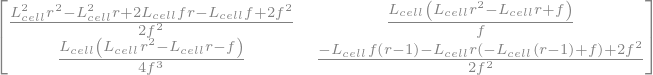

In [30]:
M_OTM_Y=QD_half@DRIFT2@QF@DRIFT1@QD_half
M_OTM_Y=sy.simplify(M_OTM_Y)
M_OTM_Y

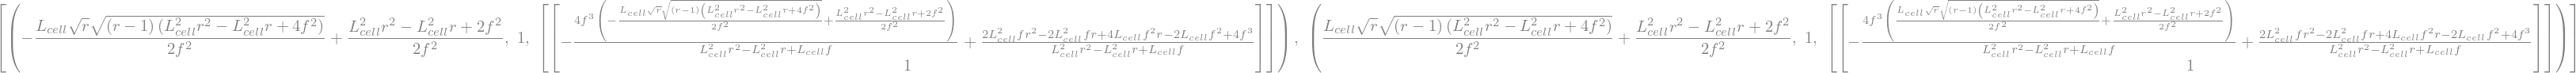

In [31]:
# STEP 2: eigen-decomposition 
eigenVectors=M_OTM.eigenvects()
#eigenVectors=sy.simplify(eigenVectors)
eigenVectors

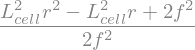

In [32]:
# Computation of cos(\mu)
((eigenVectors[0][0]+eigenVectors[1][0])/2)

We need to compare the previous expression with the one for r=0.5.
Therefore, for the stability condition, we can use the usual one by considering the equivalent $\tilde{L_{cell}}=L_{cell} 2\sqrt{r(r-1)}$.

### The triplet cell

Starting from the FODO we can consider other lattice cells. As an example, by putting back-to-back two OFOD's, we have a triplet cell (OFODDOFO).

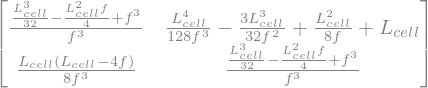

In [33]:
L_cell=sy.Symbol('L_cell', positive=True, real=True);
f=sy.Symbol('f', positive=True, real=True);
r=sy.Symbol('r', positive=True, real=True);


QF=sy.Matrix([[1,0], [-1/(f),1]])
DRIFT=sy.Matrix([[1,L_cell/4], [0,1]])
QD=sy.Matrix([[1,0], [1/f,1]])


# STEP 1: OTM matrix in the x-plane, in the the other plane one has to change the sign of f
M_OTM=DRIFT@QF@DRIFT@QD@QD@DRIFT@QF@DRIFT
M_OTM=sy.simplify(M_OTM)
M_OTM

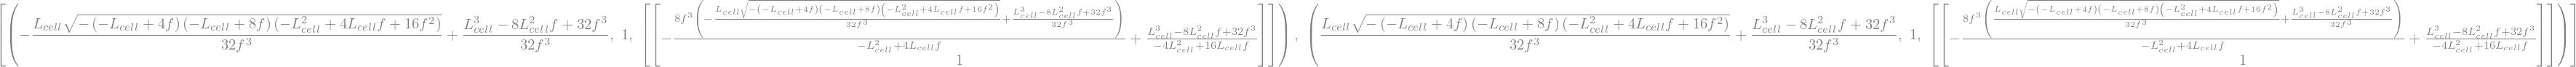

In [34]:
# STEP 2: eigen-decomposition 
eigenVectors=M_OTM.eigenvects()
# eigenVectors=sy.simplify(eigenVectors)
eigenVectors

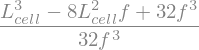

In [35]:
# Computation of cos(\mu)
((eigenVectors[0][0]+eigenVectors[1][0])/2)

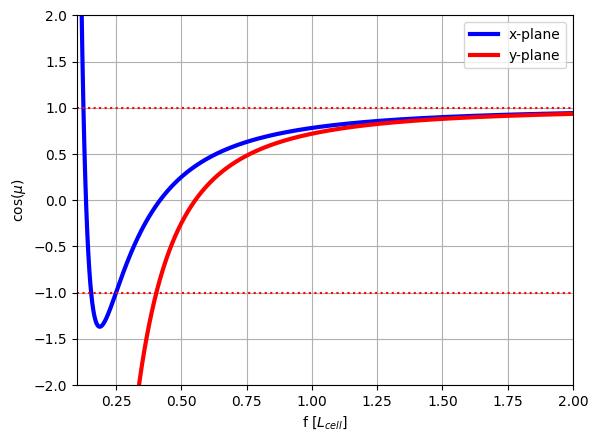

In [36]:
myF=np.linspace(0.1,2,1000)
plt.plot(myF, (1-8*myF+32*myF**3)/32/myF**3,'b',lw=3,label='x-plane')
plt.plot(myF, (1+8*myF+32*(-myF)**3)/32/(-myF)**3,'r',lw=3,label='y-plane')

plt.plot(myF, np.ones(np.shape(myF)),':r')
plt.plot(myF, -np.ones(np.shape(myF)),':r')
plt.ylim(-2,2)
plt.xlim(myF[0],myF[-1])
plt.grid()
plt.xlabel('f [$L_{cell}$]')
plt.ylabel('cos($\\mu$)')
plt.legend(loc='best')

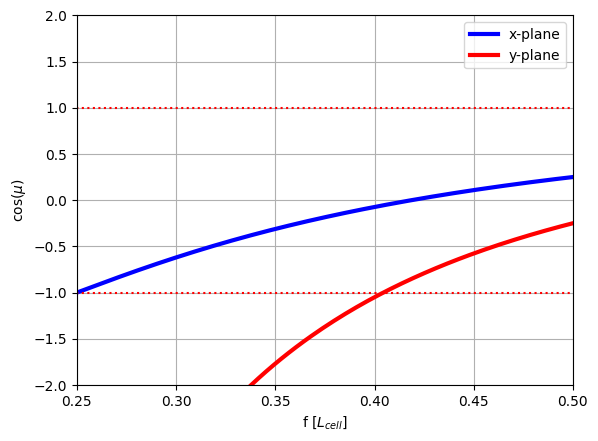

In [37]:
myF=np.linspace(0.1,2,1000)
plt.plot(myF, (1-8*myF+32*myF**3)/32/myF**3,'b',lw=3,label='x-plane')
plt.plot(myF, (1+8*myF+32*(-myF)**3)/32/(-myF)**3,'r',lw=3,label='y-plane')

plt.plot(myF, np.ones(np.shape(myF)),':r')
plt.plot(myF, -np.ones(np.shape(myF)),':r')
plt.ylim(-2,2)
plt.xlim(myF[0],myF[-1])
plt.grid()
plt.xlabel('f [$L_{cell}$]')
plt.ylabel('cos($\\mu$)')
plt.legend(loc='best')
plt.ylim(-2,2)
plt.xlim(.25,.5);

Therefore in **this triplet topology** one has stability if 
\begin{equation}
\boxed{
f\gtrsim 0.40\ L_{cell}}
\end{equation}.